# Potatoes Price Prediction Project (Beginner ML-1)

### Importing necessary libraries

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### Load the dataset

In [2]:
url="https://raw.githubusercontent.com/MamunTech/Linear-Regression-ML-Project-/master/PotatoPrice.csv"
pdata=pd.read_csv(url) 

In [3]:
pdata.head()

,potato_kg,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,55


In [25]:
pdata.rename(columns={'potato_kg':'Potato'},inplace=True)
pdata.head()


,Potato,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,55


In [27]:
pdata.describe()

,Potato,price
count,10.00000,10.000000
mean,5.50000,65.000000
std,3.02765,40.620192
min,1.00000,10.000000
25%,3.25000,28.750000
50%,5.50000,65.000000
75%,7.75000,97.500000
max,10.00000,120.000000


In [29]:
pdata.isnull()

,Potato,price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


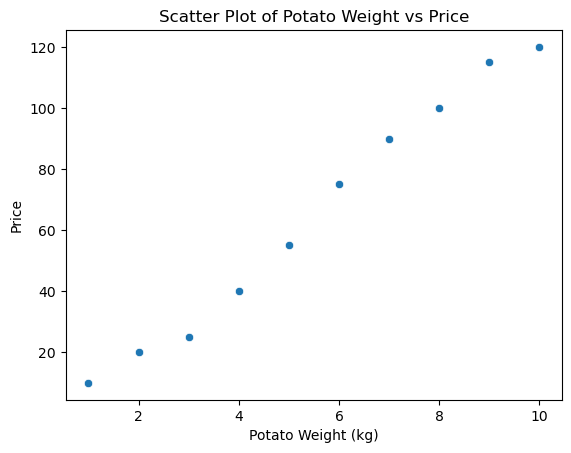

In [31]:
sns.scatterplot(data=pdata, x='Potato', y='price')
plt.title("Scatter Plot of Potato Weight vs Price")
plt.xlabel("Potato Weight (kg)")
plt.ylabel("Price")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X = pdata[['Potato']]  # Features (independent variable)
y = pdata['price']     # Target (dependent variable)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 8
Testing set size: 2


In [41]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Model Coefficients:
Intercept: -8.40517241379311
Coefficient: 13.232758620689657


In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Model Evaluation:
Mean Squared Error: 11.170667360285382
R-squared Score: 0.9950490116962724


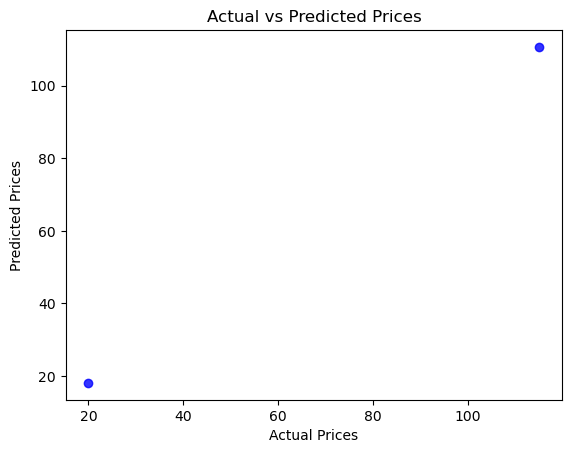

In [92]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.8, color='blue')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

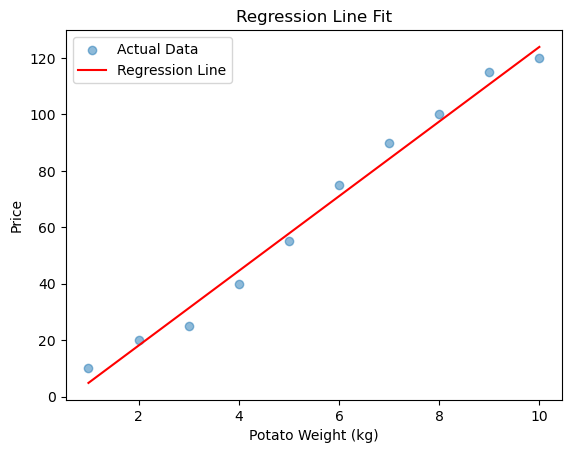

In [53]:
plt.scatter(pdata['Potato'], pdata['price'], alpha=0.5, label='Actual Data')
plt.plot(pdata['Potato'], model.predict(pdata[['Potato']]), color='red', label='Regression Line')
plt.title("Regression Line Fit")
plt.xlabel("Potato Weight (kg)")
plt.ylabel("Price")
plt.legend()
plt.show()


In [71]:
new_potato_weight = pd.DataFrame([[11]], columns=['Potato'])  # Match the training data's column name
predicted_price = model.predict(new_potato_weight)

print(f"\nPredicted Price for 11 kg of potatoes: {predicted_price[0]:.2f}")


Predicted Price for 11 kg of potatoes: 137.16


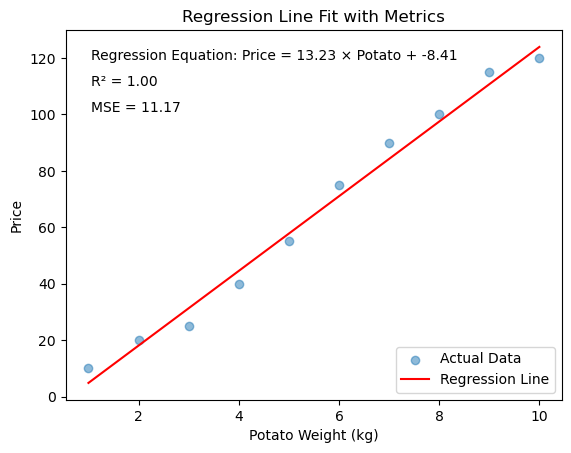

In [77]:
# Calculate R² and MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get model coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Regression equation as a string
regression_eq = f"Price = {slope:.2f} × Potato + {intercept:.2f}"

# Scatter plot of actual data and regression line with annotations
plt.scatter(pdata['Potato'], pdata['price'], alpha=0.5, label='Actual Data')
plt.plot(pdata['Potato'], model.predict(pdata[['Potato']]), color='red', label='Regression Line')
plt.title("Regression Line Fit with Metrics")
plt.xlabel("Potato Weight (kg)")
plt.ylabel("Price")

# Add equation, R², and MSE to the plot
plt.text(0.05, 0.95, f"Regression Equation: {regression_eq}", fontsize=10, transform=plt.gca().transAxes, verticalalignment='top')
plt.text(0.05, 0.88, f"R² = {r2:.2f}", fontsize=10, transform=plt.gca().transAxes, verticalalignment='top')
plt.text(0.05, 0.81, f"MSE = {mse:.2f}", fontsize=10, transform=plt.gca().transAxes, verticalalignment='top')

plt.legend()
plt.show()